In [1]:
import pandas as pd
import numpy  as np

from scipy.stats import  mannwhitneyu

import matplotlib.pyplot as plt 
from matplotlib import ticker
from matplotlib.gridspec import GridSpec


from pathlib import Path

import time

import pickle

import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  nru_DE import DE_H_stats
from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "10k_heart"

data_path = Path ( data_folder + data_subfolder )

In [3]:
# output plot
plot_jpg =  data_subfolder + "_Figure_7.jpg"

# output data
DE_stats_pkl = "DE_stats_SCT.pkl"


# input data - to calculate DE for SCTransform residuals
Pearson_residuals_pkl = "SCT_v2_Pearson_residuals_top_2000.pkl"   # Seurat output
clusters_pkl = "clusters.pkl"

# input data - Poisson model
DE_stats_Poisson_pkl = "DE_stats.pkl"
nru_dict_pkl =  "nru_dict.pkl"

# input data - SCTransform residual variance
S_g_pkl = "SCT_v2_residual_variance.pkl"



# path: output plot
plot_dsn = data_path / plot_jpg

# path: output data
DE_stats_dsn = data_path / DE_stats_pkl


# paths: input data
Pearson_residuals__dsn = data_path / Pearson_residuals_pkl
clusters_dsn = data_path / clusters_pkl
DE_stats_Poisson_dsn = data_path / DE_stats_Poisson_pkl
nru_dict_dsn = data_path / nru_dict_pkl
S_g_dsn = data_path / S_g_pkl

In [4]:
def list_top_n_H_stats ( df_plot, stat,  rank, n_top ):  
  df_plot_top = df_plot.loc [ df_plot[rank]<= n_top ] 
  h_values_top_list = df_plot_top[stat].values.tolist()    
  return  h_values_top_list	    	
			
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]

In [5]:
df_clusters = pd.read_pickle ( clusters_dsn )	
print ( '\n\n df_clusters'  )
print ( df_clusters  )

print ( '\n\n df_clusters.value_counts' )
print ( df_clusters['Cluster'].value_counts() )


df_residuals = pd.read_pickle ( Pearson_residuals__dsn )
print ( '\n\n df_residuals'  )
print ( df_residuals  )



 df_clusters
                    Cluster
Barcode                    
AAACCCAAGCGAGTCA-1        3
AAACCCAAGGTCATTC-1        6
AAACCCACACTGTGTA-1        5
AAACCCACATATCTGG-1        5
AAACCCACATCAACCA-1        9
...                     ...
TTTGGTTTCTGTACAG-1        1
TTTGTTGAGCTTTCCC-1        3
TTTGTTGGTGCTCTCT-1        1
TTTGTTGTCCCAGGAC-1        7
TTTGTTGTCTTCGACC-1        3

[7713 rows x 1 columns]


 df_clusters.value_counts
1     1899
2     1542
3     1456
4     1147
5      477
6      420
7      279
8      261
9      227
10       5
Name: Cluster, dtype: int64


 df_residuals
                    AAACCCAAGCGAGTCA-1  AAACCCAAGGTCATTC-1  ...  \
ENSMUSG00000052305           14.450854           -2.607071  ...   
ENSMUSG00000069919           14.462519           -2.731873  ...   
ENSMUSG00000073940           14.487434           -2.668206  ...   
ENSMUSG00000069917           14.462679           -2.709573  ...   
ENSMUSG00000038791           -0.114637            1.284757  ...   
...         

In [6]:
start_time = time.time()
df_DE_stats_SCT = DE_H_stats ( df_residuals, df_clusters ).rename ( columns={'H_stat':'SCT_H_stat'} )
end_time = time.time()
elapsed = end_time - start_time
print ( 'function DE_H_stats time: ',  f"{ elapsed:.1f}", ' seconds'  )

print ( '\n df_DE_stats_SCT' )
print ( df_DE_stats_SCT  )
print ( '\n\n df_DE_stats_SCT.describe' )
print ( df_DE_stats_SCT.describe ( percentiles=pctl_list ) )

function DE_H_stats time:  9.6  seconds

 df_DE_stats_SCT
                     SCT_H_stat        p_value
gene                                          
ENSMUSG00000052305  4287.399720   0.000000e+00
ENSMUSG00000069919  4634.442460   0.000000e+00
ENSMUSG00000073940  4433.764919   0.000000e+00
ENSMUSG00000069917  4722.103676   0.000000e+00
ENSMUSG00000038791  2272.043504   0.000000e+00
...                         ...            ...
ENSMUSG00000028102   959.573824  8.961691e-201
ENSMUSG00000028974  2022.444779   0.000000e+00
ENSMUSG00000033697  3058.935223   0.000000e+00
ENSMUSG00000024033  3925.558723   0.000000e+00
ENSMUSG00000049154  4170.963443   0.000000e+00

[2000 rows x 2 columns]


 df_DE_stats_SCT.describe
        SCT_H_stat        p_value
count  2000.000000   2.000000e+03
mean   2965.903298   3.063480e-61
std    1194.126281   1.370010e-59
min     293.536960   0.000000e+00
1%      525.937685   0.000000e+00
5%      866.432880   0.000000e+00
10%    1175.609609   0.000000e+00
25%   

In [7]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_A_g = nru_dict['df_gene_stats'] [['A_g']]

df_S_g = pd.read_pickle ( S_g_dsn ).rename( columns={'residual_variance':'S_g'} )

df_gene_stats = pd.concat ( [ df_A_g, df_S_g ], axis=1 ) 
print ( '\n df_gene_stats' )
print ( df_gene_stats  )


 df_gene_stats
                            A_g         S_g
ENSMUSG00000052305  5431.424034  926.243049
ENSMUSG00000069919  1391.789121  902.544951
ENSMUSG00000073940  1383.160300  677.656626
ENSMUSG00000069917   971.366465  884.129281
ENSMUSG00000038791   603.920335   13.071136
...                         ...         ...
ENSMUSG00000020905     0.443594    0.175468
ENSMUSG00000027313     0.443594    0.152987
ENSMUSG00000104861     0.443594    0.192102
ENSMUSG00000041144     0.443594    0.216514
ENSMUSG00000000154     0.443594    0.189209

[14472 rows x 2 columns]


In [8]:
df_DE_stats_Poisson = pd.read_pickle ( DE_stats_Poisson_dsn )[['H_stat']].rename ( columns={'H_stat':'Poisson_H_stat'} )
df_DE_stats_compare_methods = pd.concat ( [ df_DE_stats_Poisson, df_DE_stats_SCT[['SCT_H_stat']] ], axis=1 )
print ( '\n df_DE_stats_compare_methods' )
print ( df_DE_stats_compare_methods  )
print ( '\n\n df_DE_stats_compare_methods.describe' )
print ( df_DE_stats_compare_methods.describe ( percentiles=pctl_list ) )


 df_DE_stats_compare_methods
                    Poisson_H_stat   SCT_H_stat
gene                                           
ENSMUSG00000025902     4188.729726  4188.678169
ENSMUSG00000090031     3026.429426          NaN
ENSMUSG00000056763      686.334852   655.718082
ENSMUSG00000016918     3681.119397  3583.948564
ENSMUSG00000025930     4050.502784  4050.315197
...                            ...          ...
ENSMUSG00000028102             NaN   959.573824
ENSMUSG00000028974             NaN  2022.444779
ENSMUSG00000033697             NaN  3058.935223
ENSMUSG00000024033             NaN  3925.558723
ENSMUSG00000049154             NaN  4170.963443

[2441 rows x 2 columns]


 df_DE_stats_compare_methods.describe
       Poisson_H_stat   SCT_H_stat
count     2000.000000  2000.000000
mean      3011.641547  2965.903298
std       1173.665187  1194.126281
min        315.107357   293.536960
1%         637.989653   525.937685
5%         983.346292   866.432880
10%       1307.387853  1175.609609
2

In [9]:
df_analy_stats =  df_gene_stats.merge ( df_DE_stats_compare_methods, how='inner', left_index=True, right_index=True ) 
print ( '\n df_analy_stats' )
print ( df_analy_stats  )
print ( '\n\n df_analy_stats.describe' )
print ( df_analy_stats.describe ( percentiles=pctl_list ) )


 df_analy_stats
                            A_g         S_g  Poisson_H_stat   SCT_H_stat
ENSMUSG00000052305  5431.424034  926.243049     5500.504142  4287.399720
ENSMUSG00000069919  1391.789121  902.544951     5491.671543  4634.442460
ENSMUSG00000073940  1383.160300  677.656626     5526.846687  4433.764919
ENSMUSG00000069917   971.366465  884.129281     5493.177252  4722.103676
ENSMUSG00000038791   603.920335   13.071136     4458.960196  2272.043504
...                         ...         ...             ...          ...
ENSMUSG00000028102     0.842472    1.706792             NaN   959.573824
ENSMUSG00000028974     0.825963    1.585545             NaN  2022.444779
ENSMUSG00000033697     0.812427    1.961670             NaN  3058.935223
ENSMUSG00000024033     0.697875    3.402654             NaN  3925.558723
ENSMUSG00000049154     0.687795    2.109444             NaN  4170.963443

[2441 rows x 4 columns]


 df_analy_stats.describe
               A_g          S_g  Poisson_H_stat   SCT_H

In [10]:
df_plot_both =  df_analy_stats.dropna() 
print ( '\n df_plot_both' )
print ( df_plot_both  )
print ( '\n\n df_plot_both.describe' )
print ( df_plot_both.describe ( percentiles=pctl_list ) )
print (  '\n\n df_plot_both.corr:' )
print (  df_plot_both.corr(method='spearman') )


 df_plot_both
                            A_g         S_g  Poisson_H_stat   SCT_H_stat
ENSMUSG00000052305  5431.424034  926.243049     5500.504142  4287.399720
ENSMUSG00000069919  1391.789121  902.544951     5491.671543  4634.442460
ENSMUSG00000073940  1383.160300  677.656626     5526.846687  4433.764919
ENSMUSG00000069917   971.366465  884.129281     5493.177252  4722.103676
ENSMUSG00000038791   603.920335   13.071136     4458.960196  2272.043504
...                         ...         ...             ...          ...
ENSMUSG00000018845     2.026275    1.884479     4305.537975  4299.858491
ENSMUSG00000039942     2.025419    1.565836     2086.050879  2086.011980
ENSMUSG00000037211     2.025182    2.007553     1599.999861  1536.129580
ENSMUSG00000037754     2.023760    1.779026     1574.754562  1559.996127
ENSMUSG00000030064     2.021948    1.915043     1720.801619  1634.401516

[1559 rows x 4 columns]


 df_plot_both.describe
               A_g          S_g  Poisson_H_stat   SCT_H_sta

In [11]:
df_plot_SCT = df_analy_stats[[  'SCT_H_stat', 'S_g']].dropna() 
df_plot_SCT = df_plot_SCT.assign( rank_S_g = df_plot_SCT['S_g'].rank ( ascending=False ).values,
                      rank_SCT_H_stat = df_plot_SCT['SCT_H_stat'].rank ( ascending=False ).values )
print ( '\n df_plot_SCT' )
print ( df_plot_SCT  )


 df_plot_SCT
                     SCT_H_stat         S_g  rank_S_g  rank_SCT_H_stat
ENSMUSG00000052305  4287.399720  926.243049       1.0            205.0
ENSMUSG00000069919  4634.442460  902.544951       2.0             56.0
ENSMUSG00000073940  4433.764919  677.656626       4.0            120.0
ENSMUSG00000069917  4722.103676  884.129281       3.0             46.0
ENSMUSG00000038791  2272.043504   13.071136     212.0           1377.0
...                         ...         ...       ...              ...
ENSMUSG00000028102   959.573824    1.706792    1718.0           1868.0
ENSMUSG00000028974  2022.444779    1.585545    1896.0           1495.0
ENSMUSG00000033697  3058.935223    1.961670    1430.0           1106.0
ENSMUSG00000024033  3925.558723    3.402654     788.0            548.0
ENSMUSG00000049154  4170.963443    2.109444    1326.0            320.0

[2000 rows x 4 columns]


In [12]:
df_plot_Poisson = df_analy_stats[[ 'Poisson_H_stat', 'A_g']].dropna()   
df_plot_Poisson = df_plot_Poisson.assign( rank_A_g = df_plot_Poisson['A_g'].rank ( ascending=False ).values,
                      rank_Poisson_H_stat = df_plot_Poisson['Poisson_H_stat'].rank ( ascending=False ).values )
print ( '\n df_plot_Poisson' )
print ( df_plot_Poisson  )


 df_plot_Poisson
                    Poisson_H_stat          A_g  rank_A_g  rank_Poisson_H_stat
ENSMUSG00000052305     5500.504142  5431.424034       1.0                  2.0
ENSMUSG00000069919     5491.671543  1391.789121       2.0                  4.0
ENSMUSG00000073940     5526.846687  1383.160300       3.0                  1.0
ENSMUSG00000069917     5493.177252   971.366465       4.0                  3.0
ENSMUSG00000038791     4458.960196   603.920335       5.0                150.0
...                            ...          ...       ...                  ...
ENSMUSG00000085355     2603.602121     2.024777    1996.0               1254.0
ENSMUSG00000037754     1574.754562     2.023760    1997.0               1687.0
ENSMUSG00000037463     3684.509502     2.023106    1998.0                744.0
ENSMUSG00000030064     1720.801619     2.021948    1999.0               1624.0
ENSMUSG00000050310      881.998485     2.021636    2000.0               1930.0

[2000 rows x 4 columns]


In [13]:
df_SCT_quartiles_list = []
df_Poisson_quartlies_list = []

boxplot_DE_list = []
label_list = []

for group in range(10):
  n_top = 100 * ( 1 + group )

  h_values_SCT_top_list = list_top_n_H_stats ( df_plot_SCT, 'SCT_H_stat', 'rank_S_g', n_top )
  boxplot_DE_list.append ( h_values_SCT_top_list )
  df_SCT_H_stats = pd.DataFrame ( data = h_values_SCT_top_list, columns=[n_top] )
  df_quartiles = df_SCT_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_SCT_quartiles_list.append ( df_quartiles )
  
  h_values_nru_top_list = list_top_n_H_stats ( df_plot_Poisson, 'Poisson_H_stat', 'rank_A_g', n_top )
  boxplot_DE_list.append ( h_values_nru_top_list )
  df_Poisson_H_stats = pd.DataFrame ( data = h_values_nru_top_list, columns=[n_top] )
  df_quartiles = df_Poisson_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_Poisson_quartlies_list.append ( df_quartiles )
  
  label_list.extend (  [ str(n_top) + ' \n ' + '$S_g$',   str(n_top) + ' \n ' + '$A_g$', ] )

In [14]:
df_SCT_quartiles = pd.concat ( df_SCT_quartiles_list, axis=1, sort=False )
print ( '\n df_SCT_quartiles' )
print ( df_SCT_quartiles  )


 df_SCT_quartiles
              100          200   ...         900          1000
count   100.000000   200.000000  ...   900.000000  1000.000000
mean   3556.407833  3585.487567  ...  3420.730262  3377.235121
std     806.562806   834.840475  ...   969.462775  1000.637242
min    1043.275542   921.622056  ...   293.536960   293.536960
25%    3185.033853  3219.120111  ...  2861.645894  2737.009556
50%    3796.962511  3778.781262  ...  3690.816421  3647.350037
75%    4125.123468  4148.241251  ...  4132.707379  4124.527524
max    5266.987232  5266.987232  ...  5423.188737  5423.188737

[8 rows x 10 columns]


In [15]:
df_Poisson_quartiles = pd.concat ( df_Poisson_quartlies_list, axis=1, sort=False )
print ( '\n df_Poisson_quartiles' )
print ( df_Poisson_quartiles  )


 df_Poisson_quartiles
              100          200   ...         900          1000
count   100.000000   200.000000  ...   900.000000  1000.000000
mean   4029.798153  3813.697781  ...  3369.138142  3322.932785
std     923.489826   918.482886  ...  1036.881252  1050.813053
min    1836.356297  1421.839615  ...   315.107357   315.107357
25%    3586.528652  3226.737355  ...  2633.719604  2541.553550
50%    4259.587949  3978.271119  ...  3613.550658  3551.873070
75%    4630.721596  4421.741951  ...  4169.975859  4143.985096
max    5526.846687  5526.846687  ...  5526.846687  5526.846687

[8 rows x 10 columns]


In [16]:
# compare distributions of H-statistics for genes with highest scores

tuple_list_greater = []

for group in range(10):
  n = 100 * ( 1 + group ) 
  n_SCT = 2 * group
  n_Poisson = 1 + n_SCT
  list_SCT = boxplot_DE_list[ n_SCT ]
  list_Poisson = boxplot_DE_list [ n_Poisson ]

  MW_stat, MW_pv = mannwhitneyu( list_Poisson, list_SCT, alternative='greater' )     
  tuple_list_greater.append ( ( n , MW_stat, MW_pv ) )  

df_DE_stats_greater = pd.DataFrame ( data = tuple_list_greater, columns= ['genes', 'MW_stat', 'MW_pv'] ).set_index ( ['genes'] )
print ( '\n df_DE_stats_greater' )
print ( df_DE_stats_greater  )


 df_DE_stats_greater
        MW_stat     MW_pv
genes                    
100      6734.0  0.000011
200     23258.0  0.002420
300     49342.0  0.020432
400     85629.0  0.042508
500    127337.0  0.304449
600    179334.0  0.544207
700    245029.0  0.498497
800    315262.0  0.695953
900    395194.0  0.813110
1000   485622.0  0.867248


In [17]:
# for genes with highest scores for each method, compute Speraman correlation of scores with H-statistics

corr_tuple_list = []

top_rank_list = [50, 100, 200, 500, 1000, 2000]

for top_rank in top_rank_list:
  df_SCT_top_rank = df_plot_SCT.loc [ df_plot_SCT['rank_SCT_H_stat'] <= top_rank ].sort_values ( ['rank_SCT_H_stat'] )
  df_corr = df_SCT_top_rank[['SCT_H_stat', 'S_g']].corr ( method='spearman' )
  SCT_corr = df_corr.at['SCT_H_stat','S_g']
 
  df_Poisson_top_rank = df_plot_Poisson.loc [ df_plot_Poisson['rank_Poisson_H_stat'] <= top_rank ].sort_values ( ['rank_Poisson_H_stat'] )
  df_corr = df_Poisson_top_rank[[ 'Poisson_H_stat', 'A_g']].corr ( method='spearman' )
  Poisson_corr = df_corr.at['Poisson_H_stat', 'A_g'] 
  
  corr_tuple_list.append ( ( top_rank, SCT_corr, Poisson_corr ) ) 
  
  
df_corr_compare = pd.DataFrame ( data = corr_tuple_list, columns=[ 'genes', 'S_g', 'A_g' ] ).set_index ( ['genes'] )
print ( '\n Table 8 \n Spearman correlations of H-statistics with S_g and A_g \n for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics \n' )
print ( df_corr_compare  )


 Table 8 
 Spearman correlations of H-statistics with S_g and A_g 
 for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics 

            S_g       A_g
genes                    
50    -0.023770  0.568115
100    0.005773  0.347963
200   -0.077822  0.189419
500    0.042943  0.261139
1000   0.099026  0.169682
2000   0.375857  0.329151


C:\Users\vfkle\AppData\Local\Temp\ipykernel_4788\2978470447.py:97: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust( left=0.07, right=0.98, bottom=0.1,  top=0.95, wspace=0.25, hspace=0.3 )


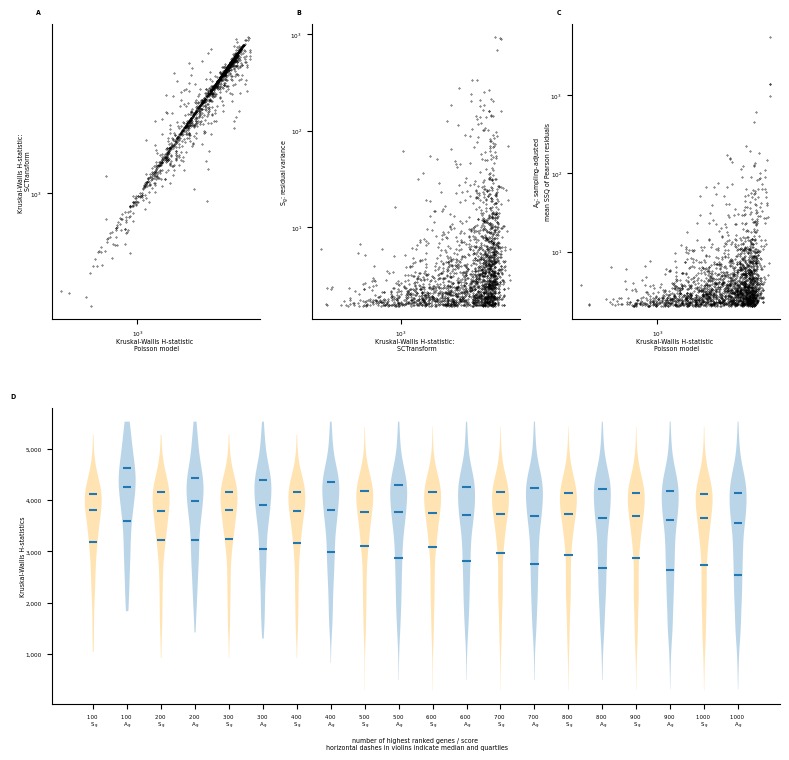

In [18]:
fig = plt.figure(constrained_layout=True, figsize=( 8, 8 ) )

gs = GridSpec( 2, 3  )

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

######

ax1.scatter ( df_plot_both[ 'Poisson_H_stat' ],df_plot_both['SCT_H_stat'], marker='o', color='k',  s=0.1)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel ( 'Kruskal-Wallis H-statistic \n Poisson model', fontsize=4.5, labelpad=-0.20 )	  
ax1.set_ylabel ( 'Kruskal-Wallis H-statistic: \n SCTransform',fontsize=4.5, labelpad=-0.20 )
ax1.tick_params(labelsize=4.1, which='major' )    
ax1.minorticks_off()
	
right = ax1.spines["right"]	
right.set_visible(False)
top = ax1.spines["top"]	
top.set_visible(False)

ax1.text(-0.05, 1.05, 'A', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax1.transAxes,)



ax2.scatter ( df_plot_SCT[ 'SCT_H_stat' ],df_plot_SCT['S_g'], marker='o', color='k',  s=0.1)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel ( 'Kruskal-Wallis H-statistic: \n SCTransform',fontsize=4.5, labelpad=-0.20 )	
ax2.set_ylabel ( '$S_g$: residual variance', fontsize=4.5, labelpad=-0.20 )	  
ax2.tick_params(labelsize=4.1, which='major' )    
ax2.minorticks_off()
	
right = ax2.spines["right"]	
right.set_visible(False)
top = ax2.spines["top"]	
top.set_visible(False)

ax2.text(-0.05, 1.05, 'B', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax2.transAxes,)



ax3.scatter ( df_plot_Poisson[ 'Poisson_H_stat' ],df_plot_Poisson['A_g'] , marker='o', color='k',  s=0.1)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel ( 'Kruskal-Wallis H-statistic \n Poisson model',fontsize=4.5, labelpad=-0.20 )	
ax3.set_ylabel ( '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', fontsize=4.5, labelpad=-0.20 )	  
ax3.tick_params(labelsize=4.1, which='major' )    
ax3.minorticks_off()
	
right = ax3.spines["right"]	
right.set_visible(False)
top = ax3.spines["top"]	
top.set_visible(False)

ax3.text(-0.05, 1.05, 'C', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax3.transAxes,)
 


params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params) 
 
n_groups = len ( boxplot_DE_list ) 
 
violin_parts = ax4.violinplot( boxplot_DE_list , showextrema = False,   showmedians = True, quantiles= n_groups* [[.25,.75]] )

for i_sct in range ( n_groups // 2 ):
  pc = violin_parts['bodies'][2*i_sct]
  pc.set_facecolor('orange')


ax4.set_xticks( list ( range ( 1,  1 + n_groups ) ) )

ax4.tick_params(labelsize=4.1)   
ax4.set_xticklabels( label_list, fontsize=3.9 )  

ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax4.set_xlabel ( '\n number of highest ranked genes / score  \n horizontal dashes in violins indicate median and quartiles', fontsize=4.5, labelpad=-0.0 )
ax4.set_ylabel ( 'Kruskal-Wallis H-statistics',fontsize=4.5, labelpad=-0.20 )	
  
	
right = ax4.spines["right"]	
right.set_visible(False)
top = ax4.spines["top"]	
top.set_visible(False)
  
ax4.text(-0.05, 1.05, 'D', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax4.transAxes,) 
      


plt.subplots_adjust( left=0.07, right=0.98, bottom=0.1,  top=0.95, wspace=0.25, hspace=0.3 )
  
plt.savefig( plot_dsn, transparent=True, dpi=300 ) 

In [19]:
df_DE_stats_SCT.to_pickle ( DE_stats_dsn )